In [3]:
import scipy.io as spio
import numpy as np
import matplotlib.pyplot as plt
import scipy 
from tqdm import tqdm
import matplotlib.pylab as pl
import matplotlib as mpl
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']
mpl.rcParams['figure.dpi']=300

plt.rcParams.update({
    "text.usetex": True,
    "font.size" : 16,
    "font.family": "serif",
    "font.serif": 'cm10',
    'savefig.bbox' : 'tight'})

from utils.array import array_pattern,get_lobes_positions

/var/folders/cw/5xff940s6559c90nyhzx9s9m0000gn/T/ipykernel_75627/1996030649.py:8: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']


## 11.

Again, redo the analysis performed in 6), but this time design a binned sparse array (as described in Holm et. al, "Sampling theory and practice", Chapter 19 available at https://www.researchgate.net/publication/266499627_Sparse_Sampling_in_Array_Processing). How does this change the array performance?

## K = 25

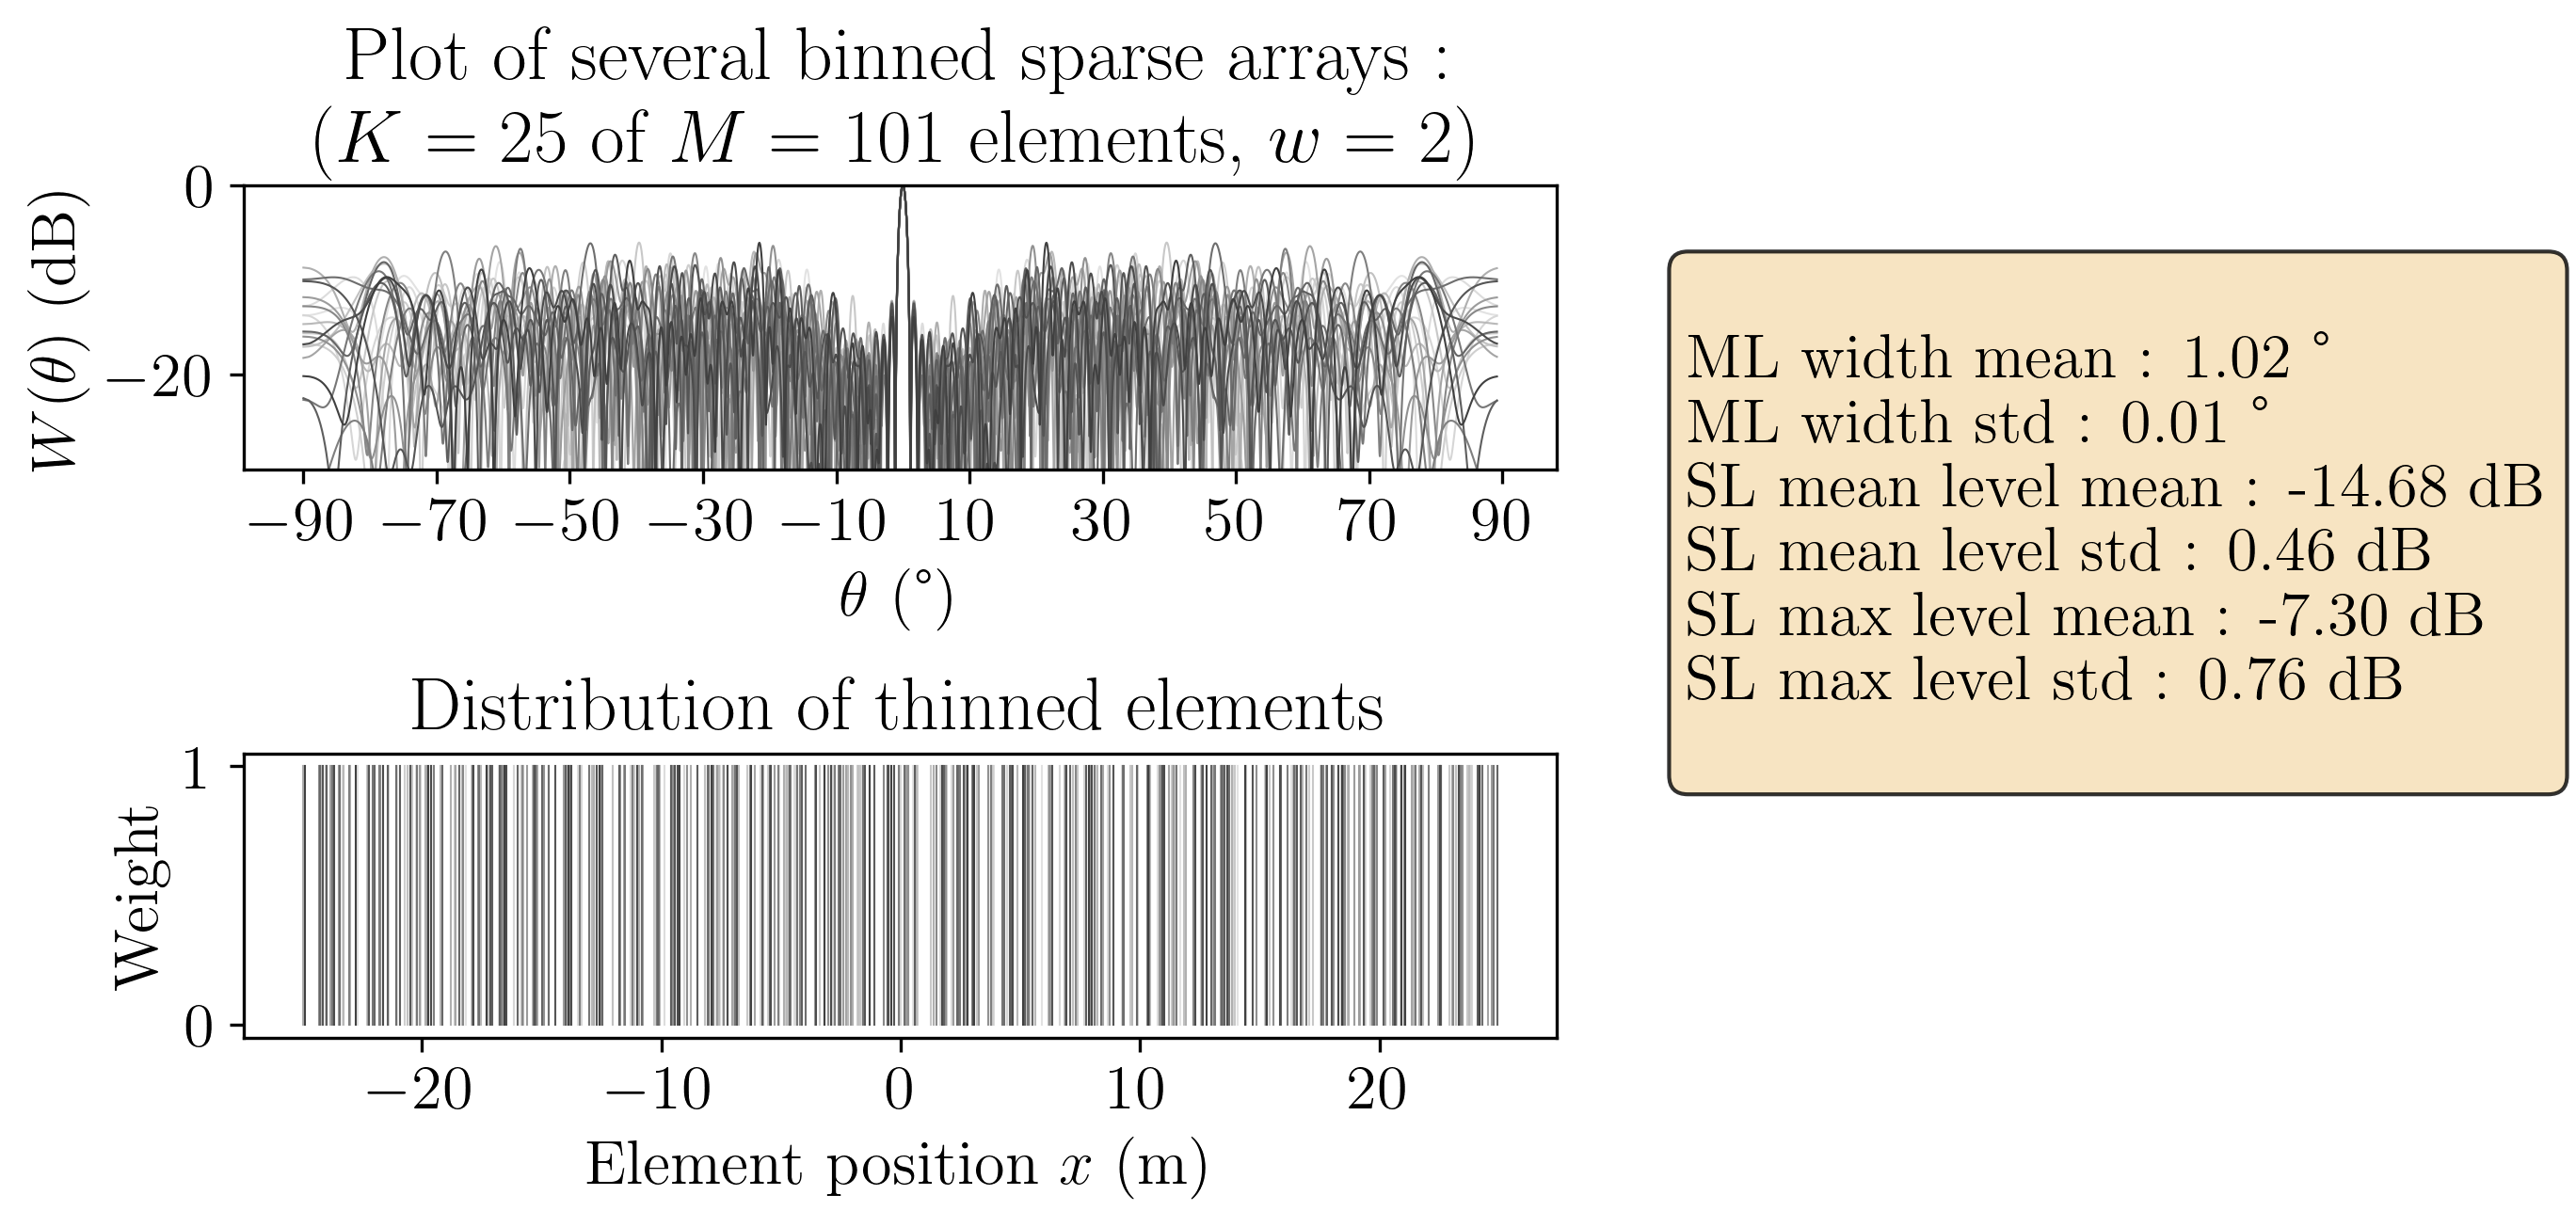

In [7]:
ML_widths_list = []
SL_mean_levels_list = []
SL_max_levels_list = []

fig, axs = plt.subplots(2)
ax1,ax2 = axs.flat

M = 101
K = 25
lambda_ = 1
spacing = lambda_/2
L = spacing*(M-1)
w = 2
weights = np.ones(K)
k_values = np.arange(-1,1,0.0001)*2*np.pi/lambda_

colors = pl.cm.Greys(np.linspace(0.2,0.8,20))

for i in range(20):

    pos = np.squeeze(np.array([-L/2 + m*w + np.random.uniform(0,w,1) for m in range(K)]))
    binned_sparse_pattern = array_pattern(pos,weights,k_values)
    binned_sparse_pattern = 20*np.log10(np.abs(binned_sparse_pattern)/np.max(np.abs(binned_sparse_pattern)))
    ax1.plot(np.arcsin(k_values*lambda_/(2*np.pi))*180/np.pi,binned_sparse_pattern,color=colors[i],linewidth=0.5)

    params = get_lobes_positions(binned_sparse_pattern,np.arcsin(k_values*lambda_/(2*np.pi))*180/np.pi)
    
    ML_widths_list.append(params['ML 3 dB width'])
    SL_mean_levels_list.append(params['SL mean level'])
    SL_max_levels_list.append(params['SL max level'])
    

    ax1.set_xticks(np.arange(-90,110,20))
    
    
    ax2.plot([pos,pos],[np.zeros(len(pos)),np.ones(len(pos))],color=colors[i],linewidth=0.5)
    
textstr = ''' 
    ML width mean : {:.2f} °
    ML width std : {:.2f} °
    SL mean level mean : {:.2f} dB
    SL mean level std : {:.2f} dB
    SL max level mean : {:.2f} dB
    SL max level std : {:.2f} dB
    '''.format(np.mean(ML_widths_list),np.std(ML_widths_list),np.mean(SL_mean_levels_list),np.std(SL_mean_levels_list),np.mean(SL_max_levels_list),np.std(SL_max_levels_list))
    


# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)

# place a text box in upper left in axes coords
ax1.text(1.1, 0.7, textstr, transform=ax1.transAxes, fontsize=16,
    verticalalignment='top', bbox=props)
    


ax1.set_ylim([-30,0])
ax1.set_xlabel('$\\theta$ (°)')
ax1.set_ylabel('$W(\\theta)$ (dB)')
ax2.set_ylabel('Weight')
ax2.set_xlabel('Element position $x$ (m)')
ax1.set_title('Plot of several binned sparse arrays :\n($K={}$ of $M={}$ elements, $w={}$)'.format(K,M,w))
ax2.set_title('Distribution of thinned elements')
fig.subplots_adjust(hspace=1)
plt.savefig('images/array/binned_spare_array_K={}_M={}.png'.format(K,M),dpi=300)

In [ ]:
## K = 50

In [ ]:
ML_widths_list = []
SL_mean_levels_list = []
SL_max_levels_list = []

fig, axs = plt.subplots(2)
ax1,ax2 = axs.flat

M = 101
K = 25
lambda_ = 1
spacing = lambda_/2
L = spacing*(M-1)
w = 2
weights = np.ones(K)
k_values = np.arange(-1,1,0.0001)*2*np.pi/lambda_

colors = pl.cm.Greys(np.linspace(0.2,0.8,20))

for i in range(20):

    pos = np.squeeze(np.array([-L/2 + m*w + np.random.uniform(0,w,1) for m in range(K)]))
    binned_sparse_pattern = array_pattern(pos,weights,k_values)
    binned_sparse_pattern = 20*np.log10(np.abs(binned_sparse_pattern)/np.max(np.abs(binned_sparse_pattern)))
    ax1.plot(np.arcsin(k_values*lambda_/(2*np.pi))*180/np.pi,binned_sparse_pattern,color=colors[i],linewidth=0.5)

    params = get_lobes_positions(binned_sparse_pattern,np.arcsin(k_values*lambda_/(2*np.pi))*180/np.pi)
    
    ML_widths_list.append(params['ML 3 dB width'])
    SL_mean_levels_list.append(params['SL mean level'])
    SL_max_levels_list.append(params['SL max level'])
    

    ax1.set_xticks(np.arange(-90,110,20))
    
    
    ax2.plot([pos,pos],[np.zeros(len(pos)),np.ones(len(pos))],color=colors[i],linewidth=0.5)
    
textstr = ''' 
    ML width mean : {:.2f} °
    ML width std : {:.2f} °
    SL mean level mean : {:.2f} dB
    SL mean level std : {:.2f} dB
    SL max level mean : {:.2f} dB
    SL max level std : {:.2f} dB
    '''.format(np.mean(ML_widths_list),np.std(ML_widths_list),np.mean(SL_mean_levels_list),np.std(SL_mean_levels_list),np.mean(SL_max_levels_list),np.std(SL_max_levels_list))
    


# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)

# place a text box in upper left in axes coords
ax1.text(1.1, 0.7, textstr, transform=ax1.transAxes, fontsize=16,
    verticalalignment='top', bbox=props)
    


ax1.set_ylim([-30,0])
ax1.set_xlabel('$\\theta$ (°)')
ax1.set_ylabel('$W(\\theta)$ (dB)')
ax2.set_ylabel('Weight')
ax2.set_xlabel('Element position $x$ (m)')
ax1.set_title('Plot of several binned sparse arrays :\n($K={}$ of $M={}$ elements, $w={}$)'.format(K,M,w))
ax2.set_title('Distribution of thinned elements')
fig.subplots_adjust(hspace=1)
plt.savefig('images/array/binned_spare_array_K={}_M={}.png'.format(K,M),dpi=300)

In [ ]:
## K = 75

In [ ]:
ML_widths_list = []
SL_mean_levels_list = []
SL_max_levels_list = []

fig, axs = plt.subplots(2)
ax1,ax2 = axs.flat

M = 101
K = 25
lambda_ = 1
spacing = lambda_/2
L = spacing*(M-1)
w = 2
weights = np.ones(K)
k_values = np.arange(-1,1,0.0001)*2*np.pi/lambda_

colors = pl.cm.Greys(np.linspace(0.2,0.8,20))

for i in range(20):

    pos = np.squeeze(np.array([-L/2 + m*w + np.random.uniform(0,w,1) for m in range(K)]))
    binned_sparse_pattern = array_pattern(pos,weights,k_values)
    binned_sparse_pattern = 20*np.log10(np.abs(binned_sparse_pattern)/np.max(np.abs(binned_sparse_pattern)))
    ax1.plot(np.arcsin(k_values*lambda_/(2*np.pi))*180/np.pi,binned_sparse_pattern,color=colors[i],linewidth=0.5)

    params = get_lobes_positions(binned_sparse_pattern,np.arcsin(k_values*lambda_/(2*np.pi))*180/np.pi)
    
    ML_widths_list.append(params['ML 3 dB width'])
    SL_mean_levels_list.append(params['SL mean level'])
    SL_max_levels_list.append(params['SL max level'])
    

    ax1.set_xticks(np.arange(-90,110,20))
    
    
    ax2.plot([pos,pos],[np.zeros(len(pos)),np.ones(len(pos))],color=colors[i],linewidth=0.5)
    
textstr = ''' 
    ML width mean : {:.2f} °
    ML width std : {:.2f} °
    SL mean level mean : {:.2f} dB
    SL mean level std : {:.2f} dB
    SL max level mean : {:.2f} dB
    SL max level std : {:.2f} dB
    '''.format(np.mean(ML_widths_list),np.std(ML_widths_list),np.mean(SL_mean_levels_list),np.std(SL_mean_levels_list),np.mean(SL_max_levels_list),np.std(SL_max_levels_list))
    


# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)

# place a text box in upper left in axes coords
ax1.text(1.1, 0.7, textstr, transform=ax1.transAxes, fontsize=16,
    verticalalignment='top', bbox=props)
    


ax1.set_ylim([-30,0])
ax1.set_xlabel('$\\theta$ (°)')
ax1.set_ylabel('$W(\\theta)$ (dB)')
ax2.set_ylabel('Weight')
ax2.set_xlabel('Element position $x$ (m)')
ax1.set_title('Plot of several binned sparse arrays :\n($K={}$ of $M={}$ elements, $w={}$)'.format(K,M,w))
ax2.set_title('Distribution of thinned elements')
fig.subplots_adjust(hspace=1)
plt.savefig('images/array/binned_spare_array_K={}_M={}.png'.format(K,M),dpi=300)